In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_csv('diabetes_012_health_indicators.csv')


In [6]:
print("Data Overview:\n", data.head())
print("\nData Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())


Data Overview:
    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [8]:
data = data.dropna()

In [10]:
data = data.dropna()  # Dropping rows with missing values
X = data.drop(columns=['Diabetes_012'])  # Features (Drop the target column)
y = data['Diabetes_012']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Logistic Regression model:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy of the Logistic Regression model: 0.8482537054556922

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       1.00      0.00      0.00       944
         2.0       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.80      0.39      0.40     50736
weighted avg       0.82      0.85      0.81     50736


Confusion Matrix:
 [[41754     0  1041]
 [  871     0    73]
 [ 5714     0  1283]]


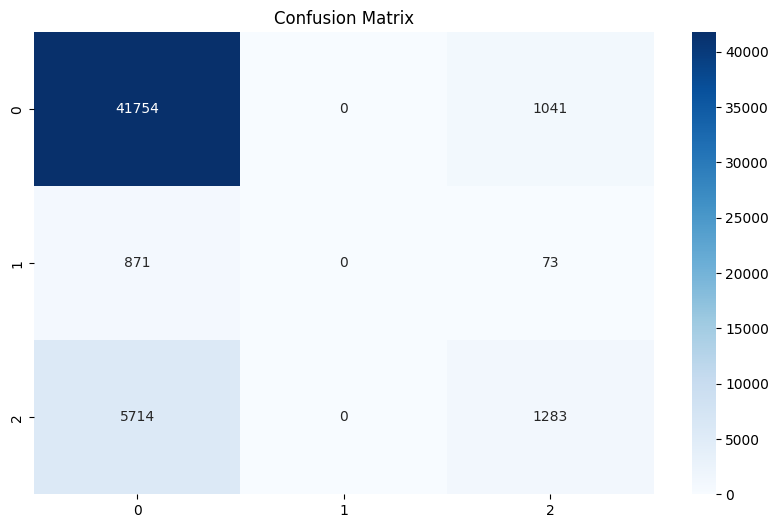

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

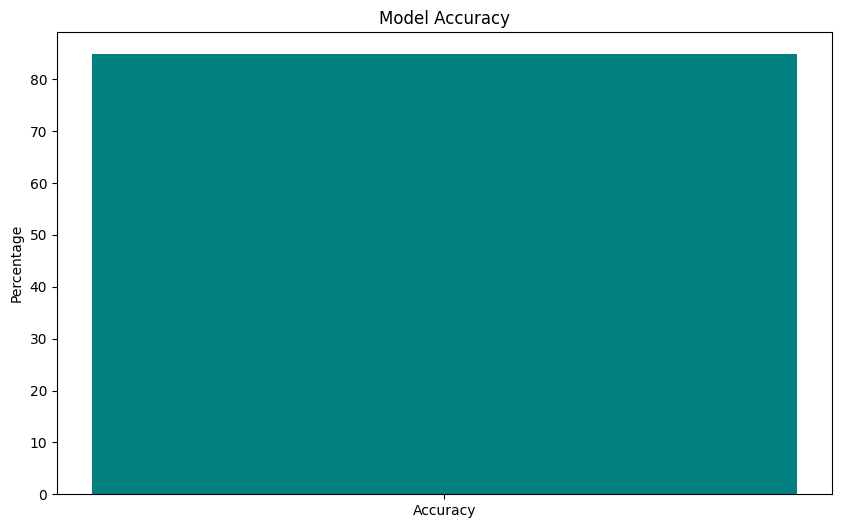

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy'], [accuracy * 100], color='teal')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.show()

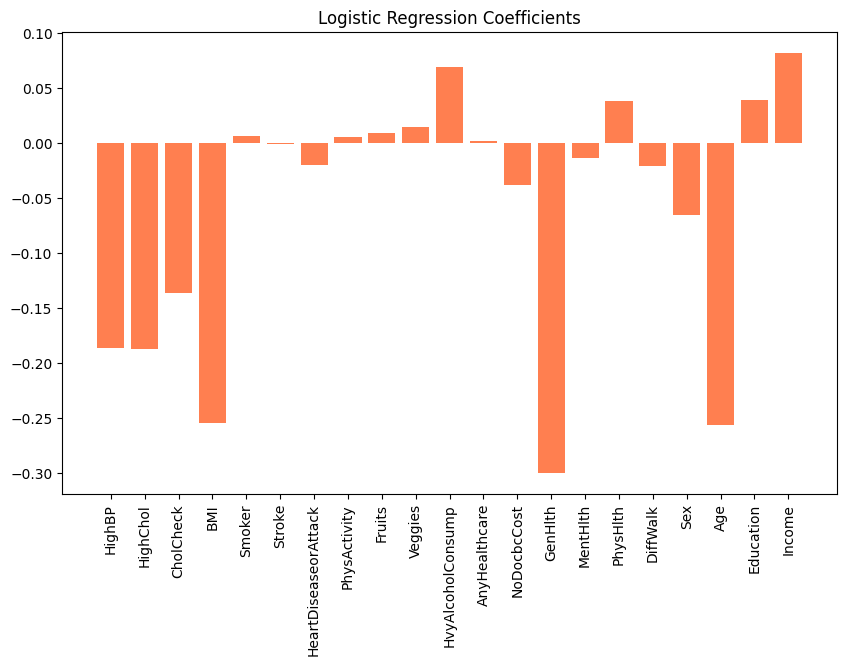

In [22]:
coefficients = model.coef_[0]
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients, color='coral')
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficients')
plt.show()

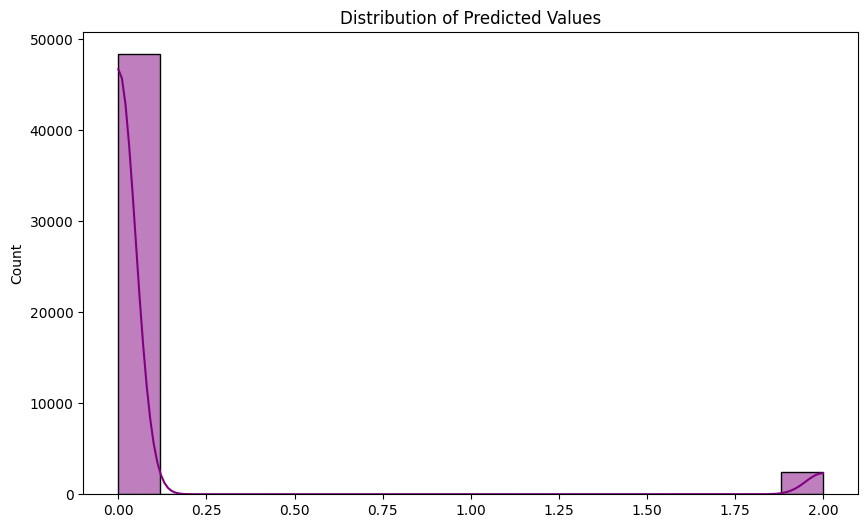

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, color='purple')
plt.title('Distribution of Predicted Values')
plt.show()

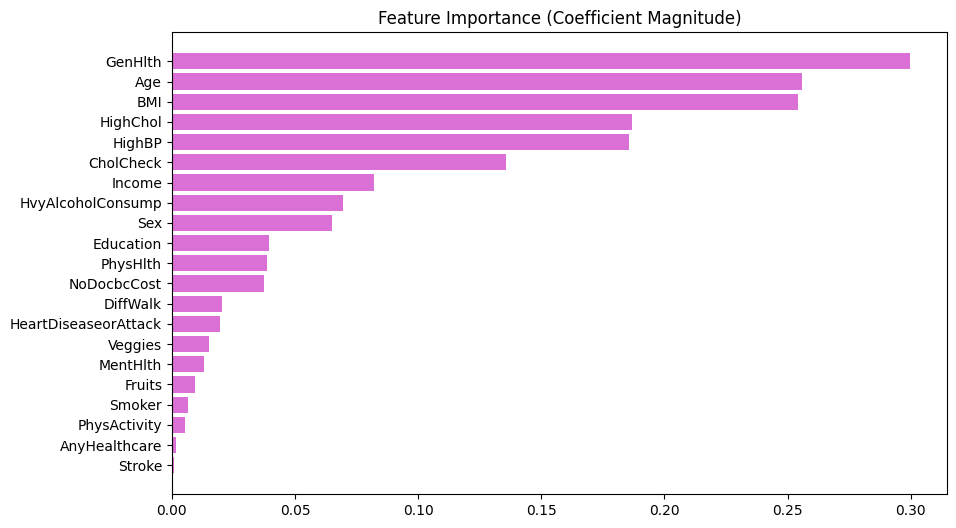

In [25]:
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importance[sorted_idx], color='orchid')
plt.title('Feature Importance (Coefficient Magnitude)')
plt.show()

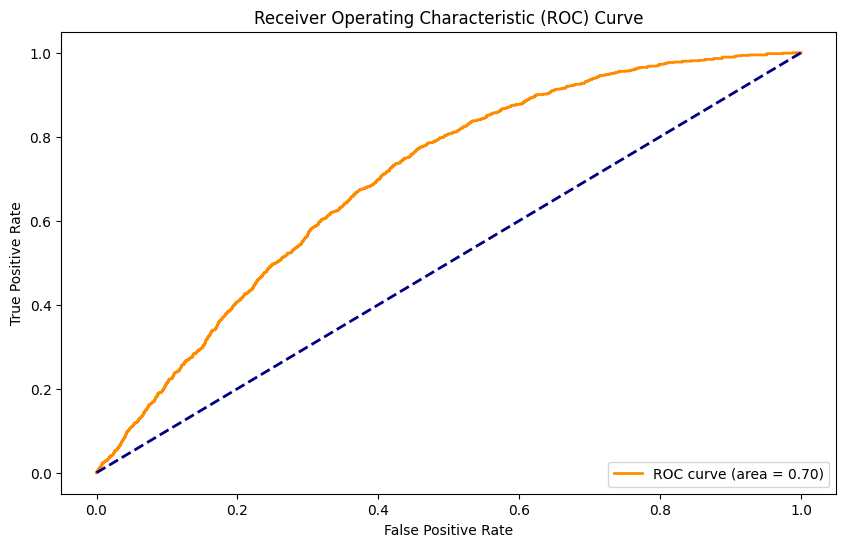

In [28]:
from sklearn.metrics import roc_curve, auc
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
all_features = list(X.columns)
user_input = {feature: 0 for feature in all_features}

user_input.update({
    'Age': float(input("Enter Age: ")),
    'BMI': float(input("Enter BMI: ")),
    'HighBP': int(input("Enter High Blood Pressure (1 for Yes, 0 for No): ")),
    'HighChol': int(input("Enter High Cholesterol (1 for Yes, 0 for No): ")),
    'CholCheck': int(input("Enter Cholesterol Check (1 for Yes, 0 for No): ")),
    'Smoker': int(input("Enter Smoker (1 for Yes, 0 for No): ")),
    'Stroke': int(input("Enter Stroke History (1 for Yes, 0 for No): ")),
    'HeartDiseaseorAttack': int(input("Enter History of Heart Disease/Attack (1 for Yes, 0 for No): ")),
    'PhysActivity': int(input("Enter Physical Activity (1 for Yes, 0 for No): ")),
    'Fruits': int(input("Consumes Fruits Regularly (1 for Yes, 0 for No): ")),
    'Veggies': int(input("Consumes Vegetables Regularly (1 for Yes, 0 for No): "))
})

user_df = pd.DataFrame([user_input])[all_features]
user_df_scaled = scaler.transform(user_df)
disease_prediction = model.predict(user_df_scaled)

print("\nPrediction for the given patient details:\n")
if disease_prediction[0] == 0:
    print("The patient is not at risk of disease.")
elif disease_prediction[0] == 1:
    print("The patient is at mild risk of diabetes.")
else:
    print("The patient is at severe risk of diabetes.")

Enter Age:  32
Enter BMI:  28
Enter High Blood Pressure (1 for Yes, 0 for No):  1
Enter High Cholesterol (1 for Yes, 0 for No):  1
Enter Cholesterol Check (1 for Yes, 0 for No):  0
Enter Smoker (1 for Yes, 0 for No):  0
Enter Stroke History (1 for Yes, 0 for No):  0
Enter History of Heart Disease/Attack (1 for Yes, 0 for No):  0
Enter Physical Activity (1 for Yes, 0 for No):  0
Consumes Fruits Regularly (1 for Yes, 0 for No):  1
Consumes Vegetables Regularly (1 for Yes, 0 for No):  0



Prediction for the given patient details:

The patient is not at risk of disease.
